In [1]:
# Importing necessary libraries

from stoneforge.petrophysics.water_saturation import archie, simandoux, indonesia, fertl
from stoneforge.petrophysics.shale_volume import vshale_larionov_old
from stoneforge.petrophysics.porosity import density_porosity
from stoneforge.petrophysics.permeability import timur, coates_dumanoir, coates
from stoneforge import datasets
from stoneforge.vis import wellplot
from stoneforge.data_management.preprocessing import DataLoader

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
# Accessing Internal Dataframe for DP1 Well

las2 = DataLoader(r"C:\Users\mario\Documents\copegeo\dados\reconcavo\7-MP-22-BA.las")
print('header itens:',las2.data_obj.header.keys())
data_DP1, units_DP1 = las2.dataframe(las2.data_obj.data)

filetype '.las' assumed to be LAS2, trying to parse as LAS2...
LAS2 parsing successful.
header itens: dict_keys(['version', 'well', 'curve'])


In [3]:
# Accessing Internal Dataframe units for DP1 Well

print(units_DP1)

{'DEPTH': 'M', 'BS': 'in', 'CALI': 'in', 'GR': 'gAPI', 'HDRS': 'ohm.m', 'RHOB': 'g/cm3', 'NPHI': 'mÂ³/mÂ³', 'DT': 'uS/ft', 'DRDN': '', 'Lith_new': ''}


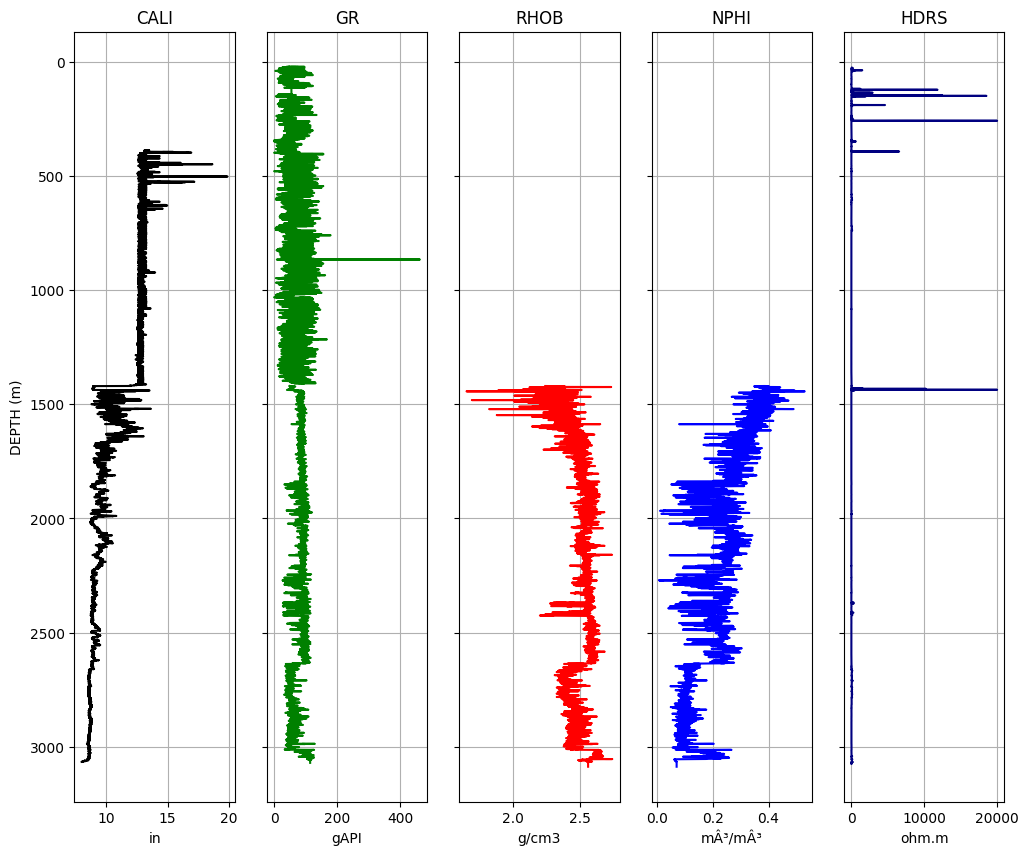

In [4]:
# Viewing Well Log Data

curves = ["CALI","GR","RHOB","NPHI",'HDRS']
units = []
for c in curves:
    units.append(units_DP1[c])

color = ["k","g","r","b","navy"]

wellplot(data_DP1,"DEPTH",curves, color, units, d_unit='m')

In [5]:
# Removing specific values
# OBS: you can use "df.dropna(inplace=True)" to remove all np.nan values

data_DP1_c = data_DP1[~data_DP1.isin([-999.0]).any(axis=1)]
data_DP1_c

,DEPTH,BS,CALI,GR,HDRS,RHOB,NPHI,DT,DRDN,Lith_new
0,9.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
30767,3086.625,NaN,NaN,NaN,NaN,2.5585,0.0711,NaN,-1.4591,49.0
30768,3086.725,NaN,NaN,NaN,NaN,2.5585,0.0711,NaN,-1.4591,49.0
30769,3086.825,NaN,NaN,NaN,NaN,2.5585,0.0711,NaN,-1.4591,49.0
30770,3086.925,NaN,NaN,NaN,NaN,2.5585,0.0711,NaN,-1.4591,49.0


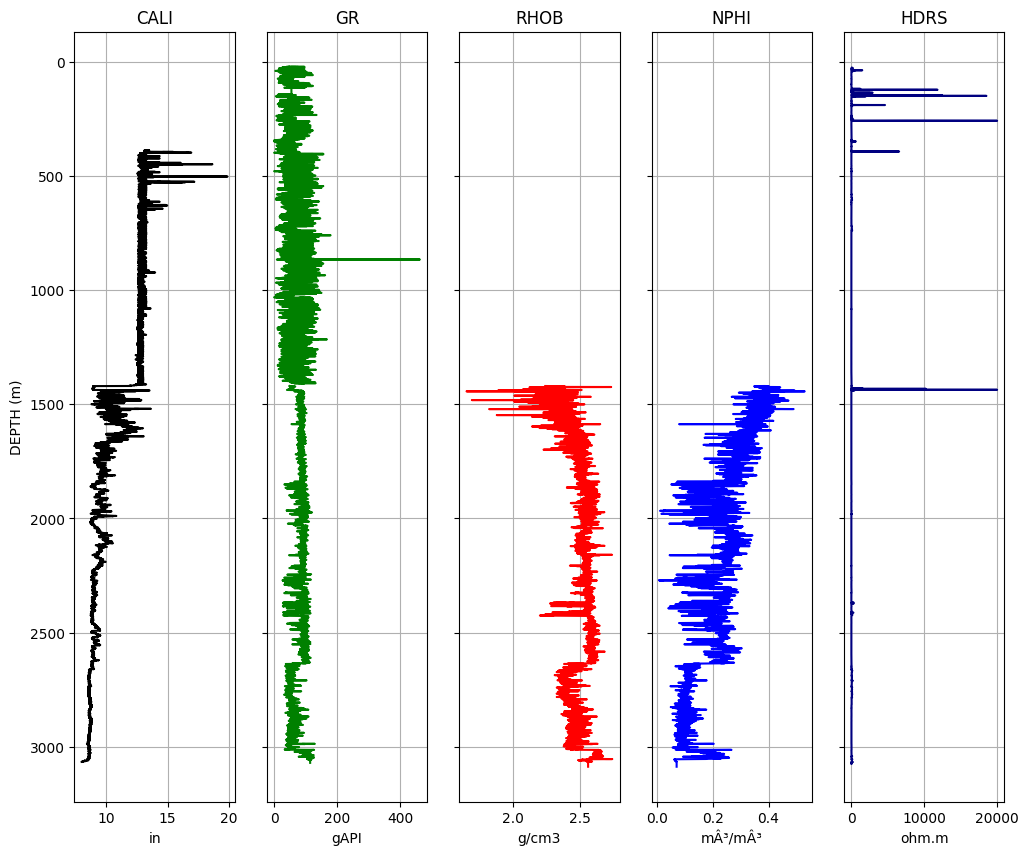

In [6]:
# Viewing Cleaned Well Log Data

wellplot(data_DP1_c,"DEPTH",curves, color, units, d_unit='m')

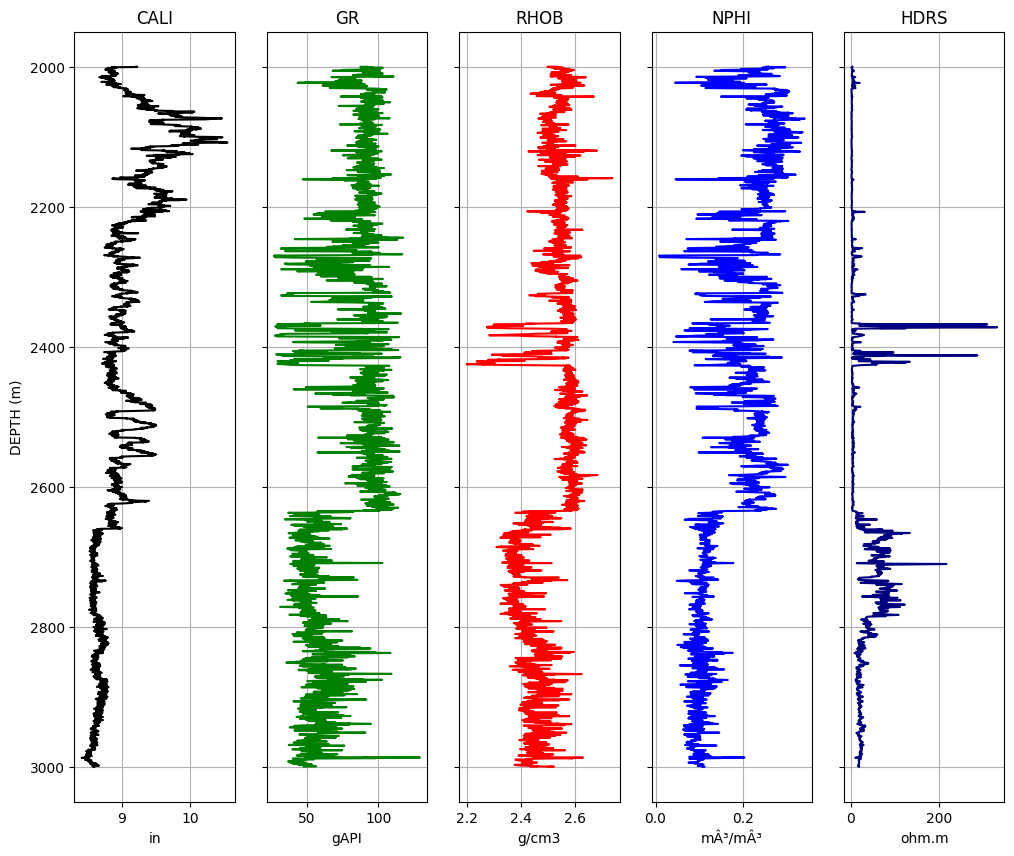

In [7]:
# Taking specific range in depth for analysis (ledge sandstone interval)

LEDGE_SANDSTONE = data_DP1_c[data_DP1_c['DEPTH'].between(2000, 3000)]
wellplot(LEDGE_SANDSTONE,"DEPTH",curves, color, units, d_unit='m')

In [8]:
# VSH Calculations

GR = np.array(LEDGE_SANDSTONE["GR"])

GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

VSH = vshale_larionov_old(gr=GR,grmin=GR_min,grmax=GR_max)

GR_min: 45.9961 |GR_max: 100.059


In [9]:
# PHI Calculations

NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])
 
PHID = density_porosity(rhob=RHOB)

In [10]:
# SW Calculations

ILD = np.array(LEDGE_SANDSTONE["HDRS"])

SW = np.array(archie(rt=ILD,phi=PHID))

LEDGE_SANDSTONE_SW = pd.DataFrame(SW)

In [11]:
# K (Permeability in mD) Calculations | from stoneforge.petrophysics.permeability import timur, coates_dumanoir, coates
K = {
    "DEPTH":LEDGE_SANDSTONE["DEPTH"],
    "timur": timur(phi=PHID, sw=SW),
    "coates_dumanoir": coates_dumanoir(resd=ILD, phi=PHID),
    "coates": coates(phi=PHID, sw=SW)
}


phi must be in (0, 1) as a fraction.
swirr must be in (0, 1) as a fraction.


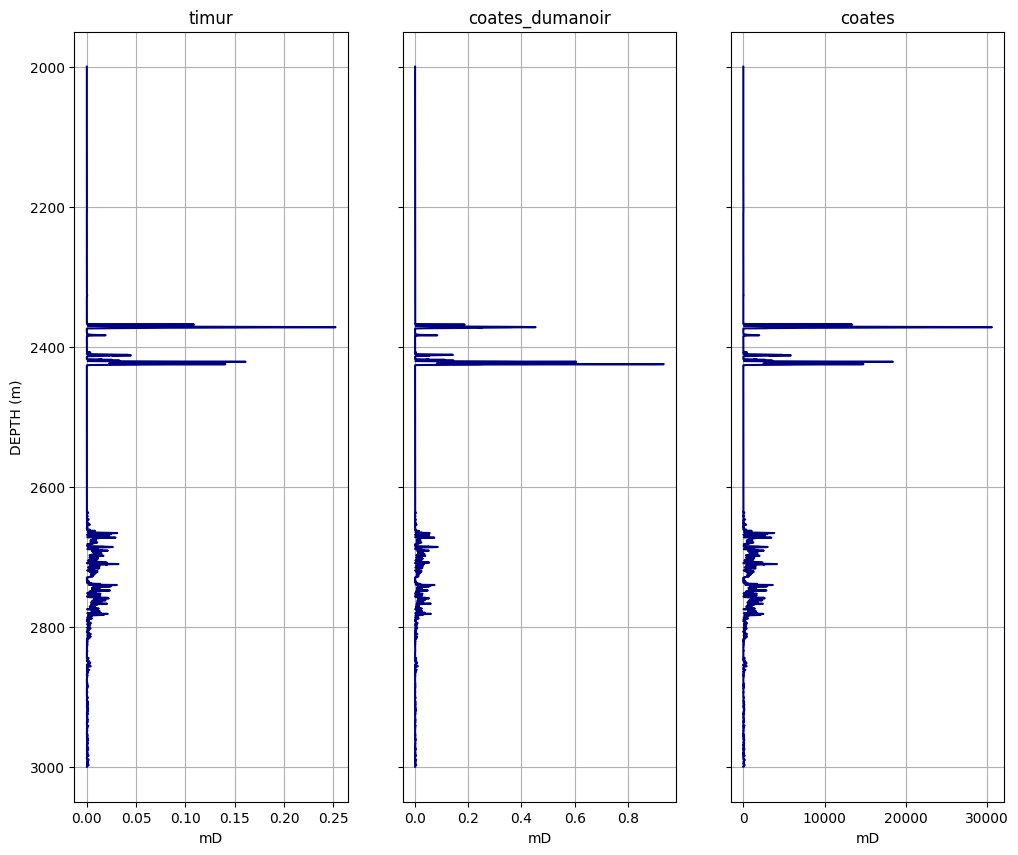

In [12]:
# Plotting K results

curves = ["timur","coates_dumanoir","coates"]
units = ["mD","mD","mD"]
color = ["navy","navy","navy"]
 
wellplot(K,"DEPTH",curves, color, units, d_unit='m')

In [ ]:
PHID